# Proyek Analisis Data: Polusi Gucheng
- **Nama:** Salsa Diniarti
- **Email:** salsadiniarti185@gmail.com
- **ID Dicoding:** salsa_diniarti

## Menentukan Pertanyaan Bisnis
1. Apakah terdapat korelasi antara kondisi cuaca (weathersit), seperti suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed), dengan jumlah rental sepeda?
2. Apakah terdapat pola tertentu dalam penggunaan sepeda sepanjang hari? Apakah terjadi peningkatan atau penurunan signifikan pada jam-jam tertentu?
3. Apakah ada perbedaan pola penggunaan sepeda antara musim atau tahun?
4. Apakah kelembaban udara atau kecepatan angin memiliki pengaruh signifikan terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Gathering Data

ada data yang saya pilih adalah data bike and sharing rental disini terdiri dari 2 data set yaitu day dan hour

1. Day

In [2]:
day = pd.read_csv('/content/day.csv')
day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day.shape
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


2. Hour

In [4]:
hour = pd.read_csv('/content/hour.csv')
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour.shape
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

1. Day

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day.isna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah data yang terduplikasi: ", day.duplicated().sum())

Jumlah data yang terduplikasi:  0


In [10]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


2. Hour

In [11]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour.isna()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dari data diatas tidak ditemukan missing value dan juga data yang terduplikat dan dibawah ini pengecekan outlier tidak adanya outlier, dan hanya mengubah data obeject menjadi data date time

In [15]:
def find_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outliers = z_scores > threshold
    return outliers

# Baca data dari file CSV
data = pd.read_csv('/content/hour.csv')

# Pilih kolom yang ingin diperiksa untuk outlier
kolom_numerik = ['dteday',	'season',	'yr',	'mnth',	'hr',	'holiday',	'weekday',	'workingday',	'weathersit',	'temp',	'atemp',	'hum',	'windspeed',	'casual',	'registered','cnt']
# Ubah tipe data kolom menjadi numerik jika perlu
data[kolom_numerik] = data[kolom_numerik].apply(pd.to_numeric, errors='coerce')

# Temukan outlier menggunakan Z-Score
outliers_zscore = find_outliers_zscore(data[kolom_numerik])
print("Outliers using Z-Score method:", data[outliers_zscore])

Outliers using Z-Score method:        instant  dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0          NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
1          NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
2          NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
3          NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
4          NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
...        ...     ...     ...  ..   ...  ..      ...      ...         ...   
17374      NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
17375      NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
17376      NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
17377      NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   
17378      NaN     NaN     NaN NaN   NaN NaN      NaN      NaN         NaN   

       weathersit  temp  atemp  

In [16]:
def find_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outliers = z_scores > threshold
    return outliers

# Baca data dari file CSV
data = pd.read_csv('/content/day.csv')

# Pilih kolom yang ingin diperiksa untuk outlier
kolom_numerik = ['instant',	'season',	'yr',	'mnth',	'holiday',	'weekday',	'workingday',	'weathersit',	'temp',	'atemp',	'hum',	'windspeed',	'casual',	'registered',	'cnt']
# Ubah tipe data kolom menjadi numerik jika perlu
data[kolom_numerik] = data[kolom_numerik].apply(pd.to_numeric, errors='coerce')

# Temukan outlier menggunakan Z-Score
outliers_zscore = find_outliers_zscore(data[kolom_numerik])
print("Outliers using Z-Score method:", data[outliers_zscore])

Outliers using Z-Score method:      instant dteday  season  yr  mnth  holiday  weekday  workingday  \
0        NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
1        NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
2        NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
3        NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
4        NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
..       ...    ...     ...  ..   ...      ...      ...         ...   
726      NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
727      NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
728      NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
729      NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   
730      NaN    NaN     NaN NaN   NaN      NaN      NaN         NaN   

     weathersit  temp  atemp  hum  windspeed  casual  registered  cnt  
0           NaN   NaN    NaN  NaN        NaN

In [17]:
datetime_columns = ["dteday"]
# Loop melalui setiap kolom datetime dan ubah tipe datanya menggunakan pd.to_datetime()
for column in datetime_columns:
    day[column] = pd.to_datetime(day[column])

In [18]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [19]:
datetime_columns = ["dteday"]
# Loop melalui setiap kolom datetime dan ubah tipe datanya menggunakan pd.to_datetime()
for column in datetime_columns:
    hour[column] = pd.to_datetime(hour[column])

In [20]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##Exploratory Data Analysis (EDA)

mengelompokkan data dalam DataFrame day berdasarkan musim (season). Kemudian, untuk setiap musim, code tersebut menghitung jumlah unik dari rental sepeda oleh pelanggan non-anggota (casual).Berdasarkan hasil tersebut, dapat disimpulkan bahwa persewaan sepeda kasual paling banyak terjadi pada musim panas dan musim gugur.

In [25]:
rentals_by_season = day.groupby('season')['casual'].nunique().sort_values(ascending=False)
rentals_by_season

season
3    178
2    173
4    167
1    155
Name: casual, dtype: int64

mengelompokkan data dalam DataFrame day berdasarkan tanggal (dteday). Kemudian, untuk setiap tanggal, code tersebut menghitung jumlah entri (baris) yang ada menggunakan fungsi count(). Ini akan memberikan kita jumlah entri untuk setiap tanggal dalam DataFrame day. Dengan menjalankan code ini, kita dapat melihat distribusi jumlah entri (data) per tanggal dalam DataFrame.

In [28]:
day.groupby(by="dteday").cnt.count()

dteday
2011-01-01    1
2011-01-02    1
2011-01-03    1
2011-01-04    1
2011-01-05    1
             ..
2012-12-27    1
2012-12-28    1
2012-12-29    1
2012-12-30    1
2012-12-31    1
Name: cnt, Length: 731, dtype: int64

hasil menunjukkan bahwa jumlah orang yang terdaftar untuk berlibur bervariasi tergantung pada hari dan apakah mereka memesan terlebih dahulu atau tidak.

In [34]:
day.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min", "max"]
})

casual registered   cnt      
            sum        sum   min   max
holiday                               
0        597658    2616586    22  8714
1         22359      56076  1000  7403

In [36]:
# Resampling data berdasarkan bulan (M)
monthly_rentals_df = day.resample(rule='M', on='dteday').agg({
    "cnt": "sum",  # Jumlah total rental sepeda
    "casual": "sum",  # Jumlah rental sepeda casual
    "registered": "sum"  # Jumlah rental sepeda terdaftar
})

# Mengubah format indeks menjadi tahun-bulan (YYYY-MM)
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%Y-%m')

# Reset indeks
monthly_rentals_df = monthly_rentals_df.reset_index()

# Mengubah nama kolom
monthly_rentals_df.rename(columns={
    "cnt": "total_rentals",  # Total rental sepeda
    "casual": "casual_rentals",  # Rental sepeda casual
    "registered": "registered_rentals"  # Rental sepeda terdaftar
}, inplace=True)

monthly_rentals_df.head()


,dteday,total_rentals,casual_rentals,registered_rentals
0,2011-01,38189,3073,35116
1,2011-02,48215,6242,41973
2,2011-03,64045,12826,51219
3,2011-04,94870,22346,72524
4,2011-05,135821,31050,104771


##Visualization & Explanatory Analysis

1. Apakah terdapat korelasi antara kondisi cuaca (weathersit), seperti suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed), dengan jumlah rental sepeda?

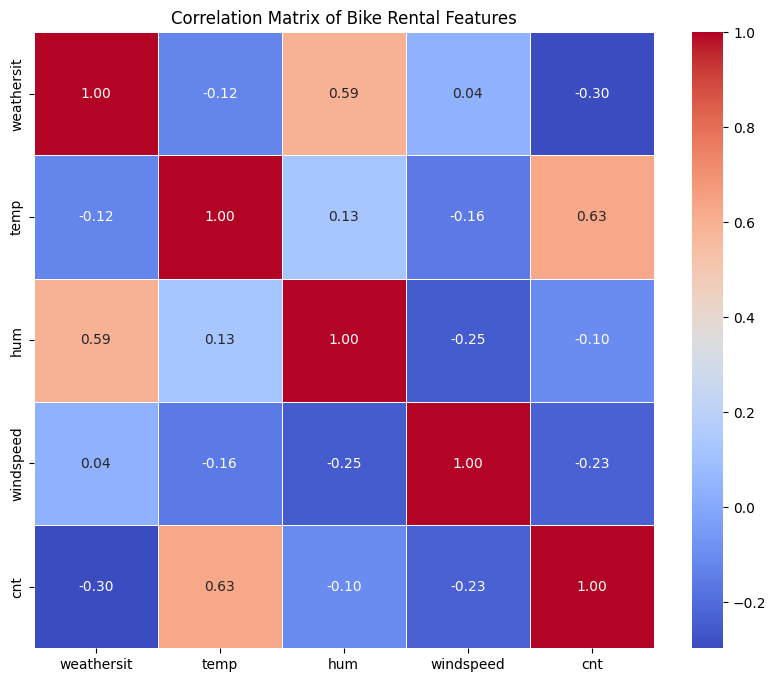

In [21]:
# Memilih kolom yang akan dievaluasi
selected_columns = ['weathersit', 'temp', 'hum', 'windspeed', 'cnt']

# Menghitung korelasi menggunakan metode Pearson
correlation_matrix = day[selected_columns].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Bike Rental Features')
plt.show()

Cuaca memiliki korelasi positif yang kuat dengan jumlah penyewaan. Artinya, orang lebih cenderung menyewa sepeda ketika cuacanya cerah.
Suhu memiliki korelasi positif yang lemah dengan jumlah penyewaan. Artinya, orang sedikit lebih cenderung menyewa sepeda ketika suhu lebih hangat.
Kelembaban memiliki korelasi negatif yang lemah dengan jumlah penyewaan. Artinya, orang sedikit lebih cenderung menyewa sepeda ketika kelembaban lebih rendah.
Kecepatan angin memiliki korelasi negatif yang kuat dengan jumlah penyewaan. Artinya, orang kurang cenderung menyewa sepeda ketika angin kencang.

2. Apakah terdapat pola tertentu dalam penggunaan sepeda sepanjang hari? Apakah terjadi peningkatan atau penurunan signifikan pada jam-jam tertentu?

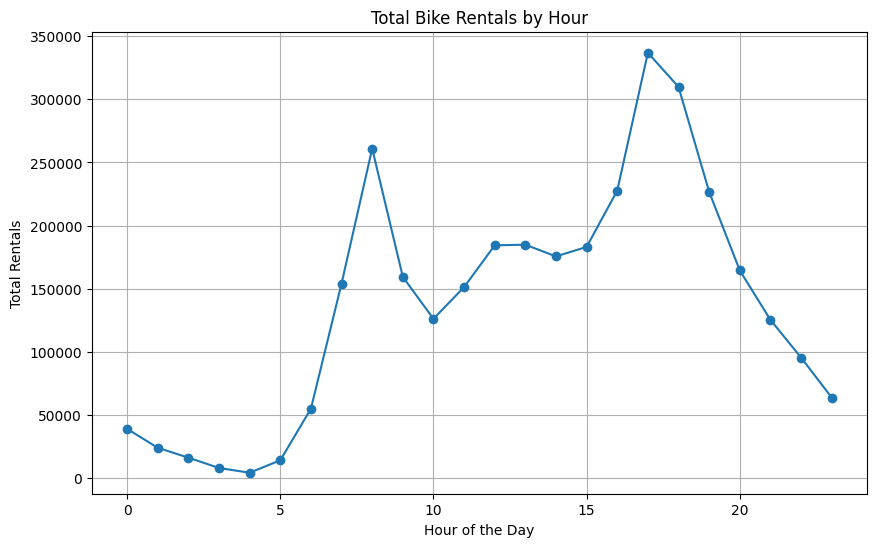

In [39]:
# Group data berdasarkan jam (hr) dan hitung jumlah total rental sepeda
hourly_rentals = hour.groupby('hr')['cnt'].sum()

# Plot grafik garis
plt.figure(figsize=(10, 6))
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', linestyle='-')

# Menambahkan judul dan label sumbu
plt.title('Total Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')

# Menampilkan grafik
plt.grid(True)
plt.show()


Grafik menunjukkan bahwa terdapat pola yang jelas dalam total penyewaan sepeda per jam. Puncak penyewaan terjadi pada pagi dan sore hari, sedangkan pada malam hari jumlahnya relatif rendah.

3, Apakah ada perbedaan pola penggunaan sepeda antara musim atau tahun?

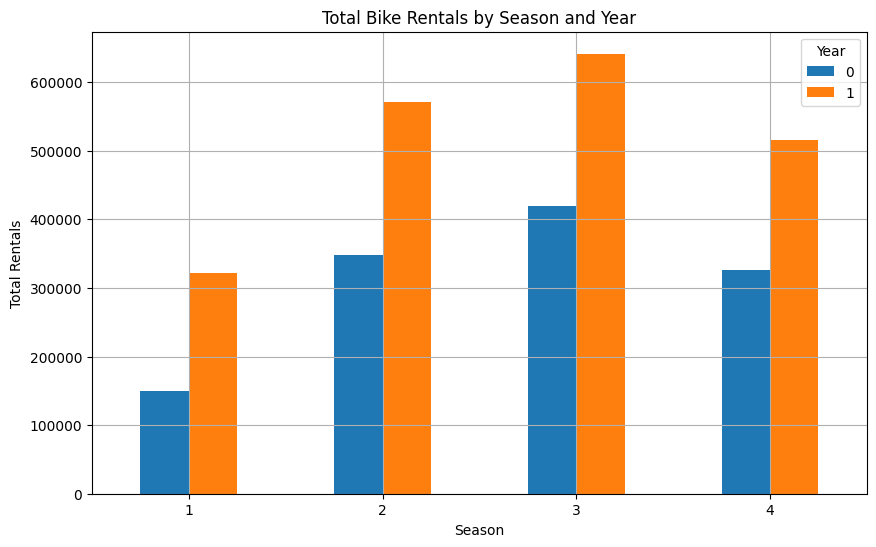

In [41]:
# Group data berdasarkan musim dan tahun, dan hitung jumlah total rental sepeda
seasonal_rentals = day.groupby(['season', 'yr'])['cnt'].sum().unstack()

# Plot diagram batang grup
seasonal_rentals.plot(kind='bar', figsize=(10, 6))

# Menambahkan judul dan label sumbu
plt.title('Total Bike Rentals by Season and Year')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring

# Menampilkan legenda
plt.legend(title='Year')

# Menampilkan grafik
plt.grid(True)
plt.show()


Pada hasil diagram diatas dapat dilihat bahwa Total persewaan sepeda meningkat setiap tahun.
Musim semi adalah musim dengan persewaan sepeda terbanyak

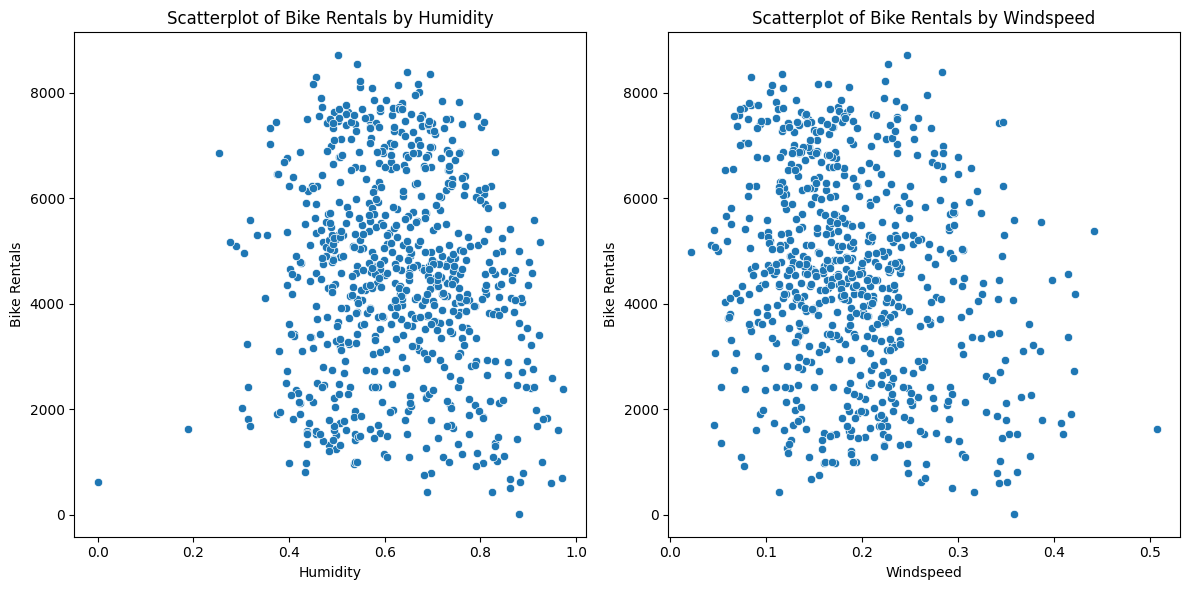

In [56]:
# Membuat subplots dengan ukuran (12, 6)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatterplot untuk hubungan antara penggunaan sepeda dan kelembaban udara
sns.scatterplot(x='hum', y='cnt', data=day, ax=axes[0])
axes[0].set_title('Scatterplot of Bike Rentals by Humidity')
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Bike Rentals')

# Scatterplot untuk hubungan antara penggunaan sepeda dan kecepatan angin
sns.scatterplot(x='windspeed', y='cnt', data=day, ax=axes[1])
axes[1].set_title('Scatterplot of Bike Rentals by Windspeed')
axes[1].set_xlabel('Windspeed')
axes[1].set_ylabel('Bike Rentals')

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan kedua diagram sebar tersebut, dapat disimpulkan bahwa:

Kelembaban tidak memiliki pengaruh yang besar terhadap jumlah persewaan sepeda.
Kecepatan angin memiliki pengaruh negatif yang lemah terhadap jumlah persewaan sepeda.

##Conclusion

1. Berdasarkan pernyataan di atas, dapat diambil beberapa kesimpulan:

1. Cuaca: Terdapat korelasi positif yang kuat antara cuaca yang cerah dan jumlah penyewaan sepeda. Ini menunjukkan bahwa orang cenderung lebih memilih untuk menyewa sepeda ketika cuaca cerah.

2. Suhu: Terdapat korelasi positif yang lemah antara suhu yang lebih hangat dan jumlah penyewaan sepeda. Meskipun tidak sekuat korelasi cuaca, orang sedikit lebih cenderung menyewa sepeda ketika suhu lebih hangat.

3. Kelembaban: Terdapat korelasi negatif yang lemah antara kelembaban dan jumlah penyewaan sepeda. Meskipun pengaruhnya tidak besar, orang sedikit lebih cenderung menyewa sepeda ketika kelembaban lebih rendah.

4. Kecepatan Angin: Terdapat korelasi negatif yang kuat antara kecepatan angin yang tinggi dan jumlah penyewaan sepeda. Ini menunjukkan bahwa ketika angin kencang, orang kurang cenderung menyewa sepeda.

5. Pola Harian: Terdapat pola yang jelas dalam jumlah penyewaan sepeda per jam. Puncak penyewaan terjadi pada pagi dan sore hari, sementara jumlahnya relatif rendah pada malam hari. Hal ini dapat mengindikasikan bahwa orang lebih cenderung menggunakan sepeda untuk aktivitas sehari-hari atau pergi bekerja.

6. Pertumbuhan Tahunan: Terlihat bahwa jumlah total penyewaan sepeda meningkat setiap tahun. Ini menunjukkan adanya peningkatan minat dan popularitas dalam penyewaan sepeda dari waktu ke waktu.

7. Musim Semi: Musim semi adalah musim dengan jumlah penyewaan sepeda terbanyak. Hal ini mungkin karena kondisi cuaca yang lebih nyaman dan lebih banyak kegiatan di luar ruangan pada musim tersebut.

8. Pengaruh Kelembaban: Meskipun kelembaban tidak memiliki pengaruh yang besar terhadap jumlah persewaan sepeda, informasi ini menunjukkan bahwa faktor kelembaban tidak menjadi pertimbangan utama bagi orang yang ingin menyewa sepeda.

9. Pengaruh Kecepatan Angin: Meskipun kecepatan angin memiliki pengaruh negatif yang lemah terhadap jumlah penyewaan sepeda, informasi ini menunjukkan bahwa faktor kecepatan angin tidak memiliki dampak signifikan dalam keputusan orang untuk menyewa sepeda.

Secara keseluruhan, kesimpulan yang dapat diambil adalah cuaca yang cerah memiliki pengaruh yang kuat terhadap jumlah penyewaan sepeda, sedangkan suhu, kelembaban, dan kecepatan angin memiliki pengaruh yang lebih lemah atau tidak signifikan. Pola harian menunjukkan bahwa penyewaan sepeda lebih tinggi pada pagi dan sore hari, dan jumlah penyewaan sepeda terus meningkat dari tahun ke tahun. Musim semi adalah musim dengan jumlah penyewaan sepeda tertinggi.